In [8]:
# Importing libraries:

import numpy as np
import pandas as pd
import os
from itertools import combinations
from collections import Counter


In [63]:
# Concatenating files:

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv",index=False)

In [13]:
# Checking columns which have null values:

all_months_data.isnull().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [15]:
# Get a concise overview of the DataFrame

all_months_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186849 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 76.4 MB


In [18]:
# Drop rows with null values:

all_months_data=all_months_data.dropna(how='all')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [22]:
# Add month column:

all_months_data["month"]=all_months_data["Order Date"].str.split(pat="/").str[0].astype("int")

C:\Users\Motasim's Pc\AppData\Local\Temp\ipykernel_27976\2144106860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data["month"]=all_months_data["Order Date"].str.split(pat="/").str[0].astype("int")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


In [24]:
# Change data type of "Quantity Ordered" column:

all_months_data["Quantity Ordered"]=all_months_data["Quantity Ordered"].astype("int")

C:\Users\Motasim's Pc\AppData\Local\Temp\ipykernel_27976\2888945164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data["Quantity Ordered"]=all_months_data["Quantity Ordered"].astype("int")


In [26]:
# Change data type of "Price Each" column:

all_months_data["Price Each"]=all_months_data["Price Each"].astype("float")

C:\Users\Motasim's Pc\AppData\Local\Temp\ipykernel_27976\289825831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data["Price Each"]=all_months_data["Price Each"].astype("float")


In [31]:
# Add a sales column:

all_months_data["Sales"]=all_months_data["Quantity Ordered"]*all_months_data["Price Each"]

C:\Users\Motasim's Pc\AppData\Local\Temp\ipykernel_27976\3944157644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data["Sales"]=all_months_data["Quantity Ordered"]*all_months_data["Price Each"]


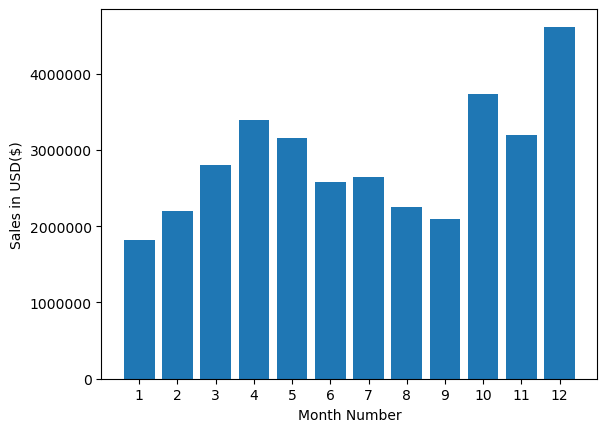

In [35]:
# Plot a bar chart showing Sales(USD) by month

import matplotlib.pyplot as plt

results= all_months_data.groupby("month").sum()

months = range(1,13)

plt.bar(months,results['Sales'])

plt.xticks(months)

plt.ticklabel_format(axis='y', style='plain')

plt.ylabel("Sales in USD($)")

plt.xlabel('Month Number')

plt.show()

# Most product sales occured in December as people buy gifts for Christmas and many stores have Christmas and New Year sales.

In [43]:
# Define functions to get City and State:

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [44]:
# Add city column:

all_months_data['City']=all_months_data['Purchase Address'].apply(lambda x: get_city(x) + ' '+get_state(x))

C:\Users\Motasim's Pc\AppData\Local\Temp\ipykernel_27976\3197157170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['City']=all_months_data['Purchase Address'].apply(lambda x: get_city(x) + ' '+get_state(x))


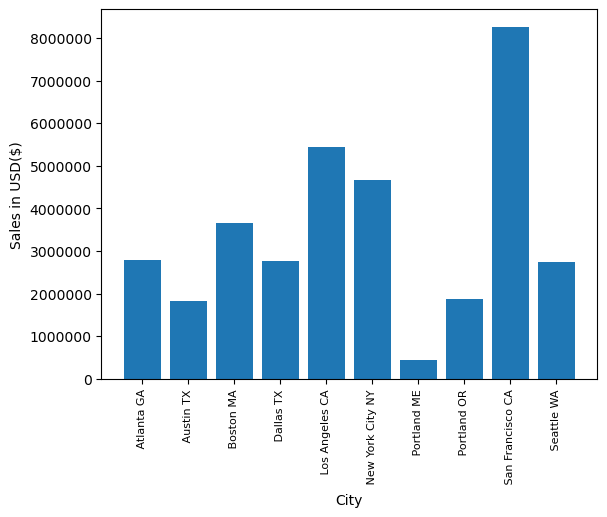

In [64]:
# Plotting Sales(USD) by City:

results= all_months_data.groupby("City").sum()

cities= [city for city,df in all_months_data.groupby('City')]

plt.bar(cities,results['Sales'])

plt.xticks(cities,rotation='vertical',size=8)

plt.ticklabel_format(axis='y', style='plain')

plt.ylabel("Sales in USD($)")

plt.xlabel('City')

plt.show()

# San Franciso had the most sales


In [50]:
# Changing data type of "Order Date" column:

all_months_data["Order Date"] = pd.to_datetime(all_months_data['Order Date'])

C:\Users\Motasim's Pc\AppData\Local\Temp\ipykernel_27976\718282837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data["Order Date"] = pd.to_datetime(all_months_data['Order Date'])


In [52]:
# Adding hour and minute columns:

all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute


C:\Users\Motasim's Pc\AppData\Local\Temp\ipykernel_27976\3405596834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
C:\Users\Motasim's Pc\AppData\Local\Temp\ipykernel_27976\3405596834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Minute'] = all_months_data['Order Date'].dt.minute


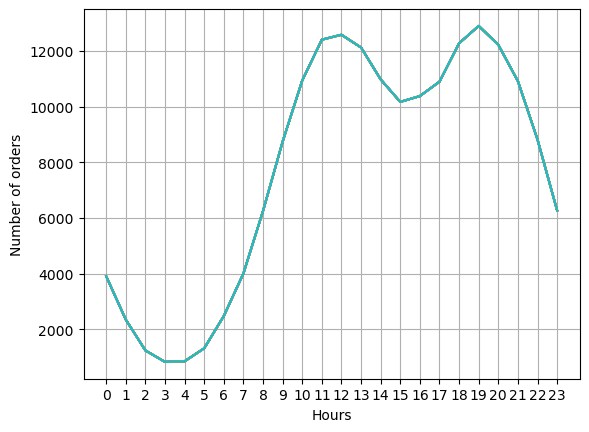

In [55]:
# Plotting Number of orders vs hour of day:

hours= [hour for hour,df in all_months_data.groupby('Hour')]

plt.plot(hours,all_months_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of orders")
plt.grid()
plt.show()

# Most orders are places at noon and in the evening.

In [66]:
df=all_months_data[all_months_data["Order ID"].duplicated(keep=False)]

df["Grouped"]=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Dropping duplicates

df=df[["Order ID","Grouped"]].drop_duplicates()

df.head()


C:\Users\Motasim's Pc\AppData\Local\Temp\ipykernel_27976\3834128418.py:3: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df["Grouped"]=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


ValueError: cannot reindex on an axis with duplicate labels

In [67]:
# Plotting quantity ordered by Product

product_group=all_months_data.groupby('Product')

quantity_ordered=product_group.sum()['Quantity Ordered']

products= [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.ylabel("Quantity Ordered")

plt.xlabel('Product')

plt.xticks(products,rotation='vertical',size=8)


plt.show()

KeyError: 'Quantity Ordered'

In [68]:
# Plotting Price as well as Orders Placed for products

prices=all_months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
# ax1.plot(products, y1, 'g-')
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()

# The plot shows that generally higher priced items have less orders and lower priced consumable items 
# (e.g. batteries) have more orders.

KeyError: 'Price Each'